In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data1=pd.read_excel("List.xlsx")

In [3]:
#  Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.
# - Which is the most profitable channel
# - Which category/keyword is the most profitable
# - Look for insights by analyzing data points on time series graphs
# - Analyse the Impact of geography

In [4]:
data1.head()

,Product Name,Categories,Date of Report,Average Position,Clicks,cc,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
0,Omnify,Coaching,2020-10-20 00:00:00,13.0,1.0,NaN,2.0,Capterra,UNITED STATES,NaN,NaN,NaT
1,Omnify,Dance Studio,2020-10-20 00:00:00,20.0,1.0,NaN,2.0,Capterra,UNITED KINGDOM,NaN,NaN,NaT
2,Omnify,Personal Trainer,2020-10-20 00:00:00,6.0,1.0,NaN,2.0,Capterra,SINGAPORE,NaN,NaN,NaT
3,Omnify,Scheduling,2020-10-20 00:00:00,59.0,1.0,NaN,2.0,GetApp,UNITED STATES,NaN,NaN,NaT
4,Omnify,Class Registration,2020-10-21 00:00:00,6.0,1.0,NaN,2.0,Capterra,AUSTRALIA,NaN,NaN,NaT


In [5]:
data1.info

<bound method DataFrame.info of      Product Name          Categories       Date of Report  Average Position  \
0          Omnify            Coaching  2020-10-20 00:00:00             13.00   
1          Omnify        Dance Studio  2020-10-20 00:00:00             20.00   
2          Omnify    Personal Trainer  2020-10-20 00:00:00              6.00   
3          Omnify          Scheduling  2020-10-20 00:00:00             59.00   
4          Omnify  Class Registration  2020-10-21 00:00:00              6.00   
...           ...                 ...                  ...               ...   
2086       Omnify  Class Registration           04-30-2021             10.00   
2087       Omnify     Club Management           04-30-2021              1.00   
2088       Omnify            Coaching           04-30-2021             14.67   
2089       Omnify        Dance Studio           04-30-2021              8.00   
2090       Omnify             Fitness           04-30-2021              8.00   

      C

In [6]:
data1.describe()

,Average Position,Clicks,cc,Money Spent ($),Prospects
count,2090.000000,2090.000000,163.000000,2089.000000,66.000000
mean,10.731464,1.663636,1.141104,12.074318,1.030303
std,11.219817,2.798869,0.542938,39.172291,0.172733
min,0.000000,1.000000,1.000000,2.000000,1.000000
25%,3.000000,1.000000,1.000000,2.000000,1.000000
50%,8.000000,1.000000,1.000000,7.250000,1.000000
75%,13.000000,2.000000,1.000000,12.250000,1.000000
max,74.000000,80.000000,6.000000,1460.000000,2.000000


In [7]:
data1['Date'] = pd.to_datetime(data1['Date of Report'])

In [8]:
df_weekly = data1.resample('W', on='Date').sum()
df_monthly = data1.resample('M', on='Date').sum()

In [9]:
data2=pd.read_excel("Omnify-Analyst-Intership-Task (1).xlsx")

In [10]:
data2['Payments'] = pd.to_numeric(data2['Payment ($)'], errors='coerce').fillna(0)
data2['cost'] = pd.to_numeric(data2['Cost ($)'], errors='coerce').fillna(0)
data2['RoAS']=pd.to_numeric(data2['Payments']/data2['cost'],errors='coerce').fillna(0)
# For example, to get the average RoAS for each cohort date
average_roas_by_cohort = data2.groupby('Week')['RoAS'].mean()

# Or to get the total clicks and impressions for each cohort date
cohort_metrics = data2.groupby('Week').agg({'Clicks': 'sum', 'Impressions': 'sum'})


In [11]:
data2

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,Payments,cost,RoAS
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA,0.0,38.33,0.0
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA,0.0,11.70,0.0
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA,0.0,45.13,0.0
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA,0.0,23.91,0.0
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA,0.0,4.89,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,NaN,NaT,USA,0.0,0.00,0.0
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,NaN,NaT,USA,0.0,0.00,0.0
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,NaN,NaT,USA,0.0,0.00,0.0
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,NaN,NaT,USA,0.0,0.00,0.0


In [12]:

# Merge the two DataFrames based on the 'clicks'
data = pd.merge(data1, data2, on='Clicks')



In [13]:
most_profitable_channel = data.groupby('Channel')['RoAS'].sum().idxmax()

In [14]:
print(most_profitable_channel)

Capterra


In [15]:
most_profitable_category_keyword = data.groupby(['Categories', 'Search Keyword'])['RoAS'].sum().idxmax()


In [16]:
print(most_profitable_category_keyword)

('Camp Management', 'booking management software')


In [17]:
most_profitable_category_keyword1 = data.groupby(['Categories', 'Keyword type'])['RoAS'].sum().idxmax()


In [18]:
print(most_profitable_category_keyword1)

('Camp Management', 'Broad')


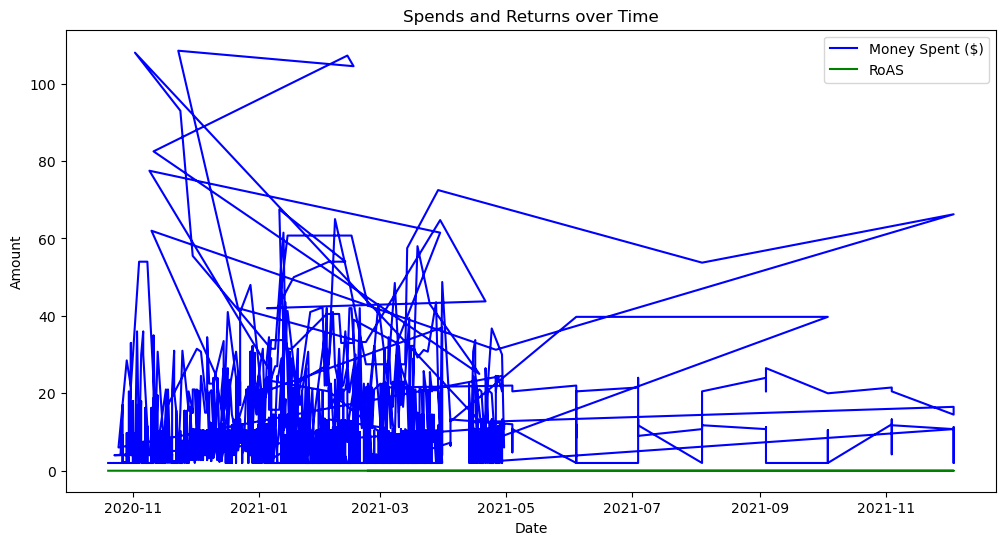

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Money Spent ($)'], label='Money Spent ($)', color='blue')
plt.plot(data['Date'], data['RoAS'], label='RoAS', color='green')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Spends and Returns over Time')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(data['Date'], data['Money Spent ($)'], label='Money Spent ($)', color='blue', alpha=0.7)
plt.bar(data['Date'], data['RoAS'], label='RoAS', color='green', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Spends and Returns over Time')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['Money Spent ($)'], bins=20, label='Money Spent ($)', color='blue', alpha=0.7)
plt.hist(data['RoAS'], bins=20, label='RoAS', color='green', alpha=0.7)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Spends and Returns')
plt.legend()
plt.show()
